In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv")
data
#text can be added into the predication so it needs to be preprocessed and scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
data.info()#finding any values missing droping nan entry
data.dropna(inplace= True) # bringing same values and for all non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
#spliting training and test
from sklearn.model_selection import train_test_split # x and y
x= data.drop(['median_house_value'], axis=1) #data frame without variable axis is drop 1 column
y= data['median_house_value'] #
x


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [5]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

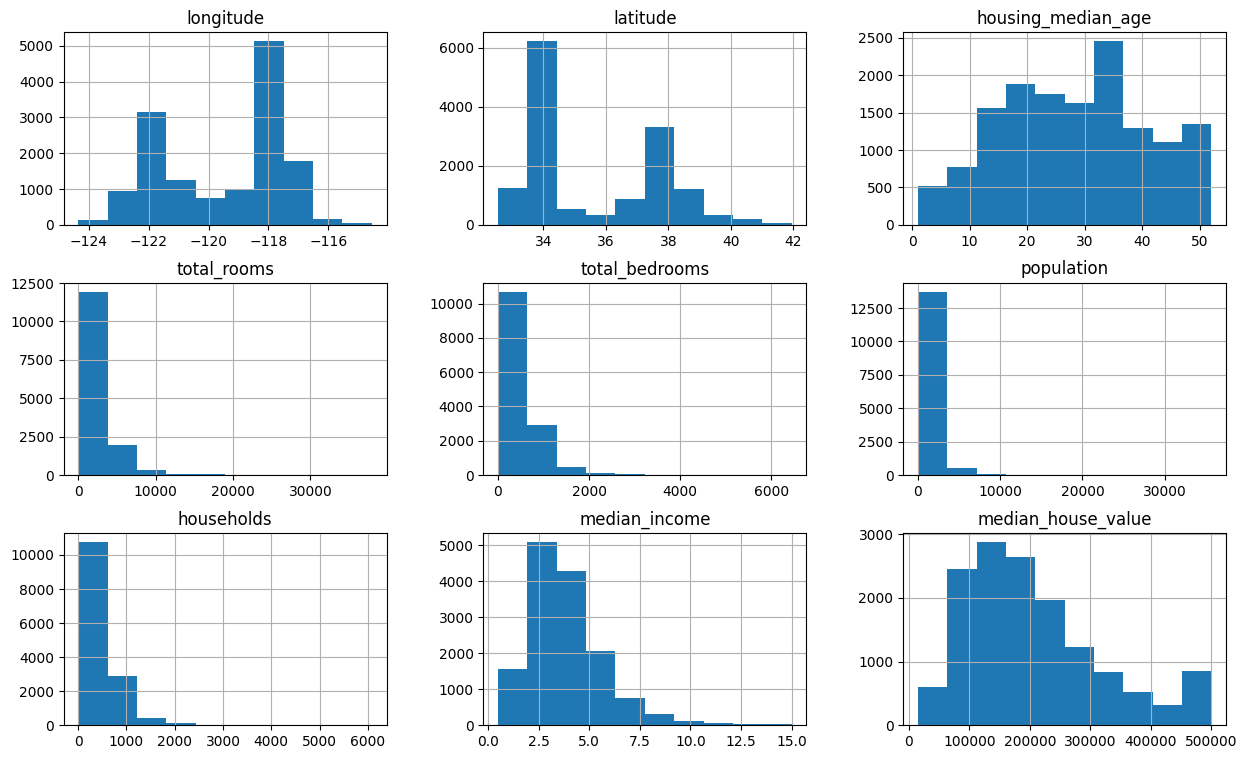

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)#x and y for training and test for unseen test

train_data = x_train.join(y_train)
train_data.hist(figsize=(15,9))

In [7]:
train_data.corr()

<ipython-input-7-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925613,-0.111534,0.041144,0.064378,0.094102,0.051351,-0.016015,-0.051584
latitude,-0.925613,1.000000,0.017217,-0.033258,-0.062559,-0.101577,-0.065991,-0.078924,-0.137466
housing_median_age,-0.111534,0.017217,1.000000,-0.362257,-0.321471,-0.296298,-0.305810,-0.115030,0.112184
total_rooms,0.041144,-0.033258,-0.362257,1.000000,0.931492,0.855582,0.922264,0.196525,0.127043
total_bedrooms,0.064378,-0.062559,-0.321471,0.931492,1.000000,0.874647,0.980151,-0.008352,0.043455
population,0.094102,-0.101577,-0.296298,0.855582,0.874647,1.000000,0.904217,0.001890,-0.031293
households,0.051351,-0.065991,-0.305810,0.922264,0.980151,0.904217,1.000000,0.013369,0.057821
median_income,-0.016015,-0.078924,-0.115030,0.196525,-0.008352,0.001890,0.013369,1.000000,0.689717
median_house_value,-0.051584,-0.137466,0.112184,0.127043,0.043455,-0.031293,0.057821,0.689717,1.000000


<ipython-input-8-f68dccd4b360>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot= True) # median house corr high to the median house values.  latitude negtive corr


<Axes: >

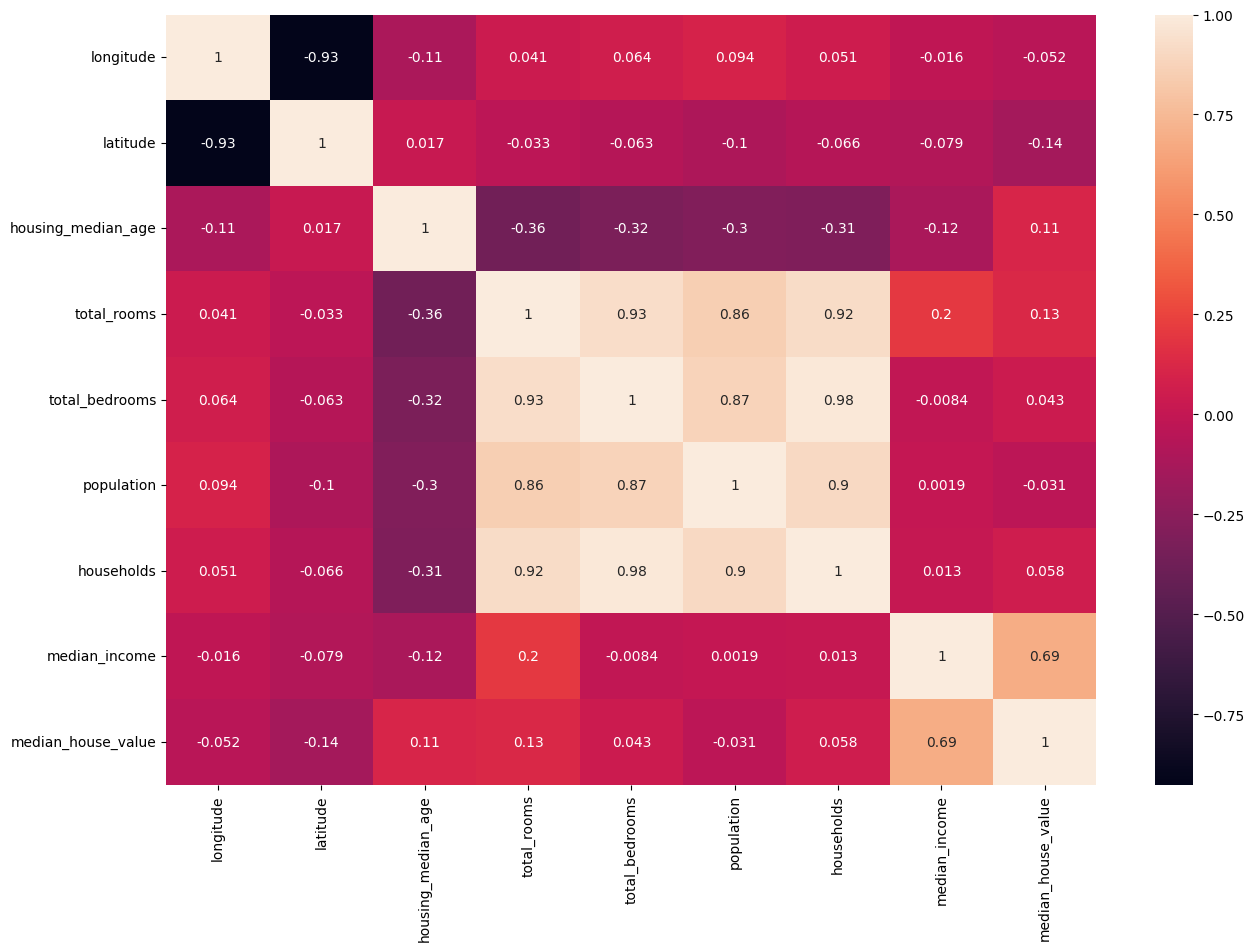

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot= True) # median house corr high to the median house values.  latitude negtive corr

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

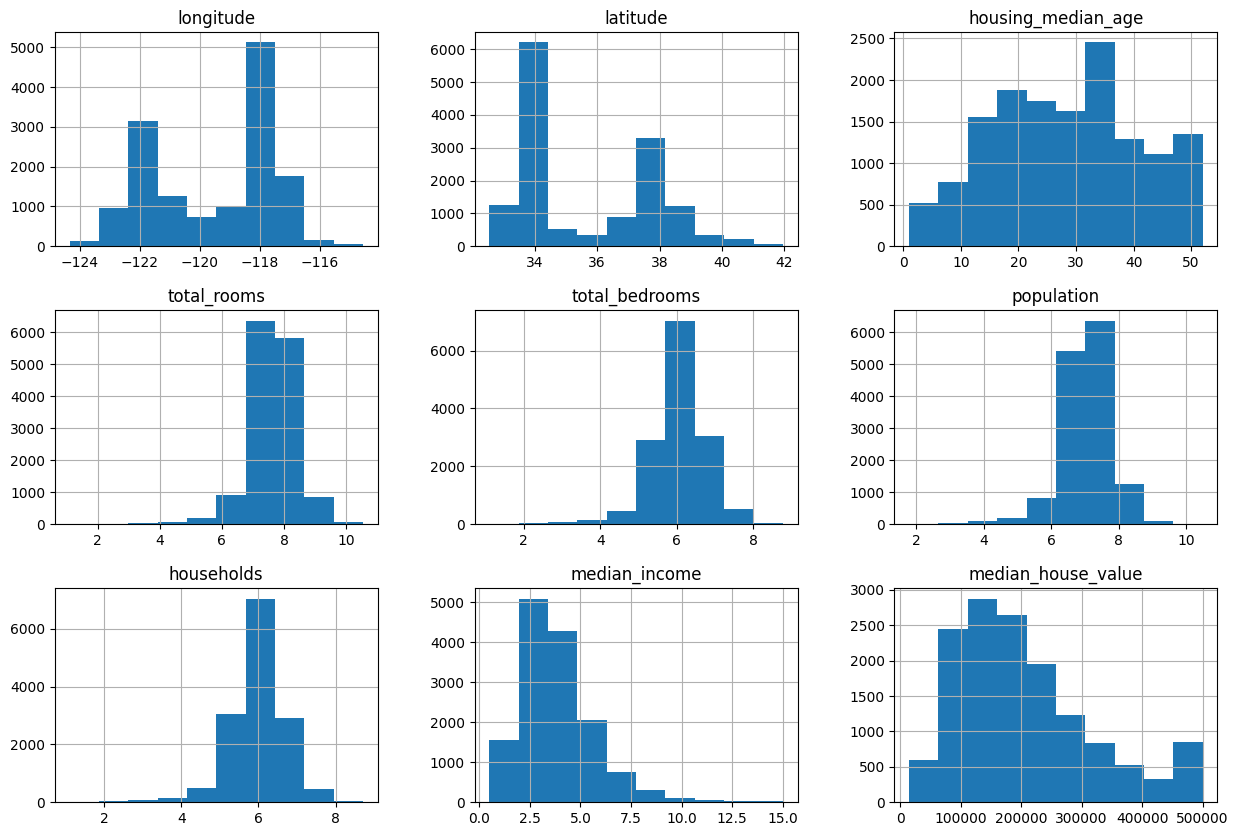

In [9]:
train_data['total_rooms']=np.log(train_data['total_rooms'] +1) #taking the log as the data is not disorted inaccurate and falls left and making it and +1 for any 0 value
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] +1)
train_data['population']=np.log(train_data['population'] +1)
train_data['households']=np.log(train_data['households'] +1)

train_data.hist(figsize=(15,10))

In [10]:
#converting text into number and getting the location to onehot encoding either 0 or1
train_data.ocean_proximity.value_counts()

<1H OCEAN     6322
INLAND        4533
NEAR OCEAN    1852
NEAR BAY      1593
ISLAND           3
Name: ocean_proximity, dtype: int64

In [11]:
#one hot encoding pandas
# insteading of assigning number, creating new feature give valu of 0 or 1 if location is close to the ocean with yes or no 0 and 1
pd.get_dummies(train_data.ocean_proximity) # this year
train_data.join(pd.get_dummies(train_data.ocean_proximity)) # cat shows the  data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15228,-117.20,33.07,5,9.249080,7.388946,8.411166,7.348588,5.9289,NEAR OCEAN,411300,0,0,0,0,1
3146,-118.51,35.16,7,8.382976,6.590301,7.566828,6.484635,4.6250,INLAND,136800,0,1,0,0,0
9153,-118.53,34.44,19,7.159292,5.278115,6.478510,5.267858,6.0398,<1H OCEAN,217800,1,0,0,0,0
5995,-117.73,34.09,30,7.760467,6.208590,7.548556,6.120297,2.4375,INLAND,112100,0,1,0,0,0
20570,-121.96,38.54,6,7.303843,5.765191,6.796824,5.733341,3.2222,INLAND,139600,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,-119.69,36.75,13,7.759614,6.016157,7.206377,6.006353,4.0027,INLAND,93100,0,1,0,0,0
5374,-118.38,34.04,39,7.869019,6.345636,7.418181,6.317165,3.4063,<1H OCEAN,271600,1,0,0,0,0
16678,-120.63,35.13,16,7.893945,6.558198,6.883463,6.429719,1.7878,<1H OCEAN,55000,1,0,0,0,0
9917,-122.31,38.33,26,7.676010,5.828946,6.863803,5.902633,4.0132,NEAR BAY,174700,0,0,0,1,0


In [12]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) # adding the new feature that is training data

<Axes: >

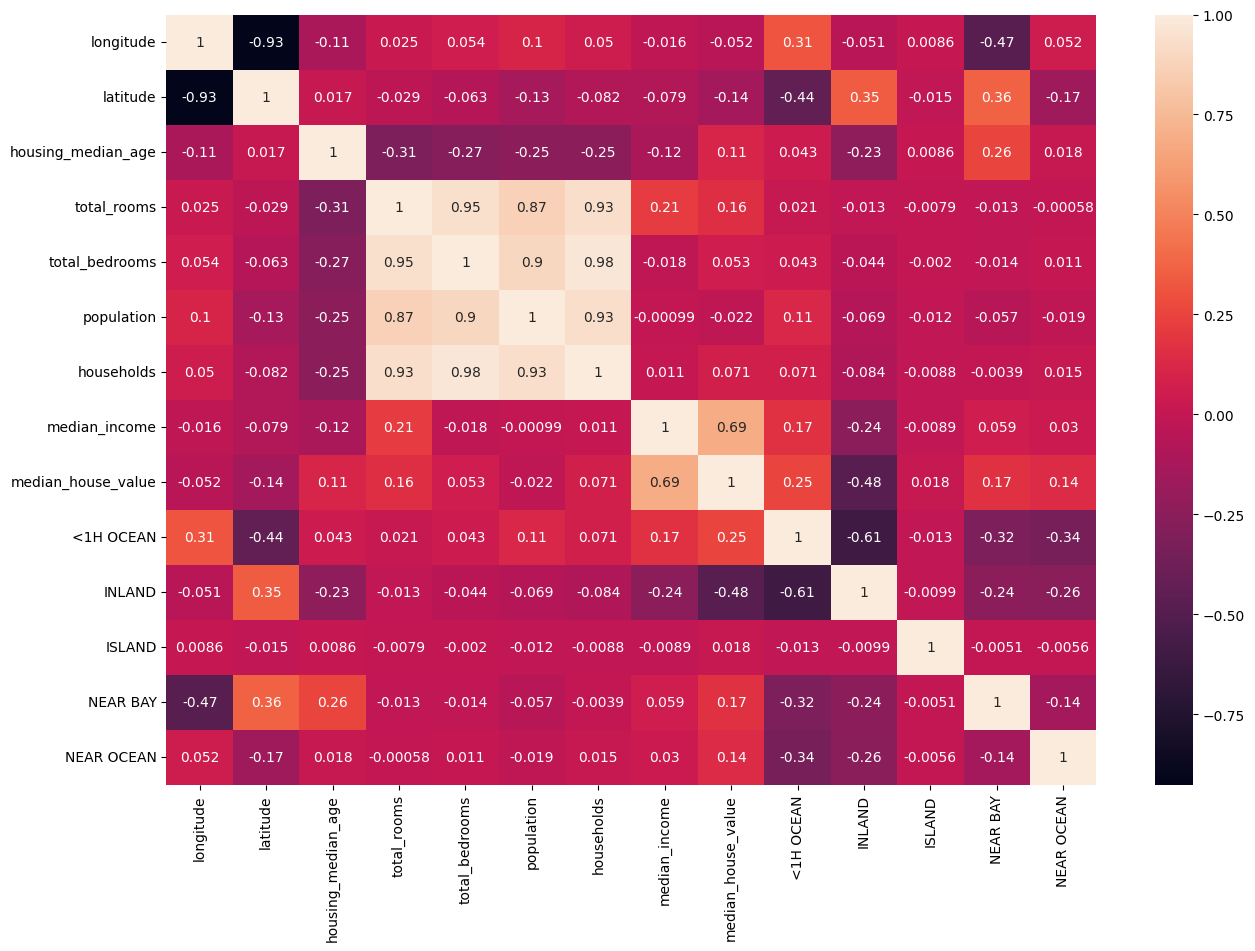

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot= True) # median house corr high to the median house values.  latitude negtive corr

<Axes: xlabel='latitude', ylabel='longitude'>

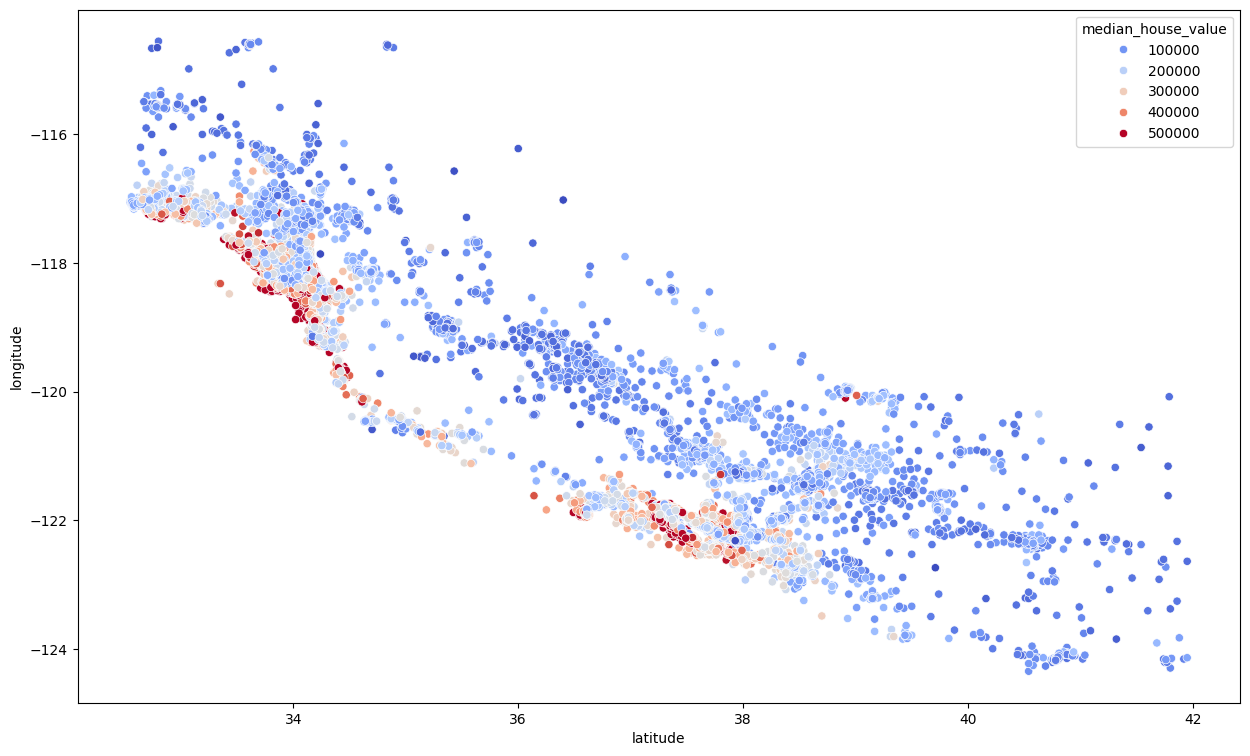

In [14]:
plt.figure(figsize=(15,9))
sns.scatterplot(x="latitude", y="longitude", data=train_data,hue="median_house_value", palette="coolwarm") #looking at map more red more expensive

<Axes: >

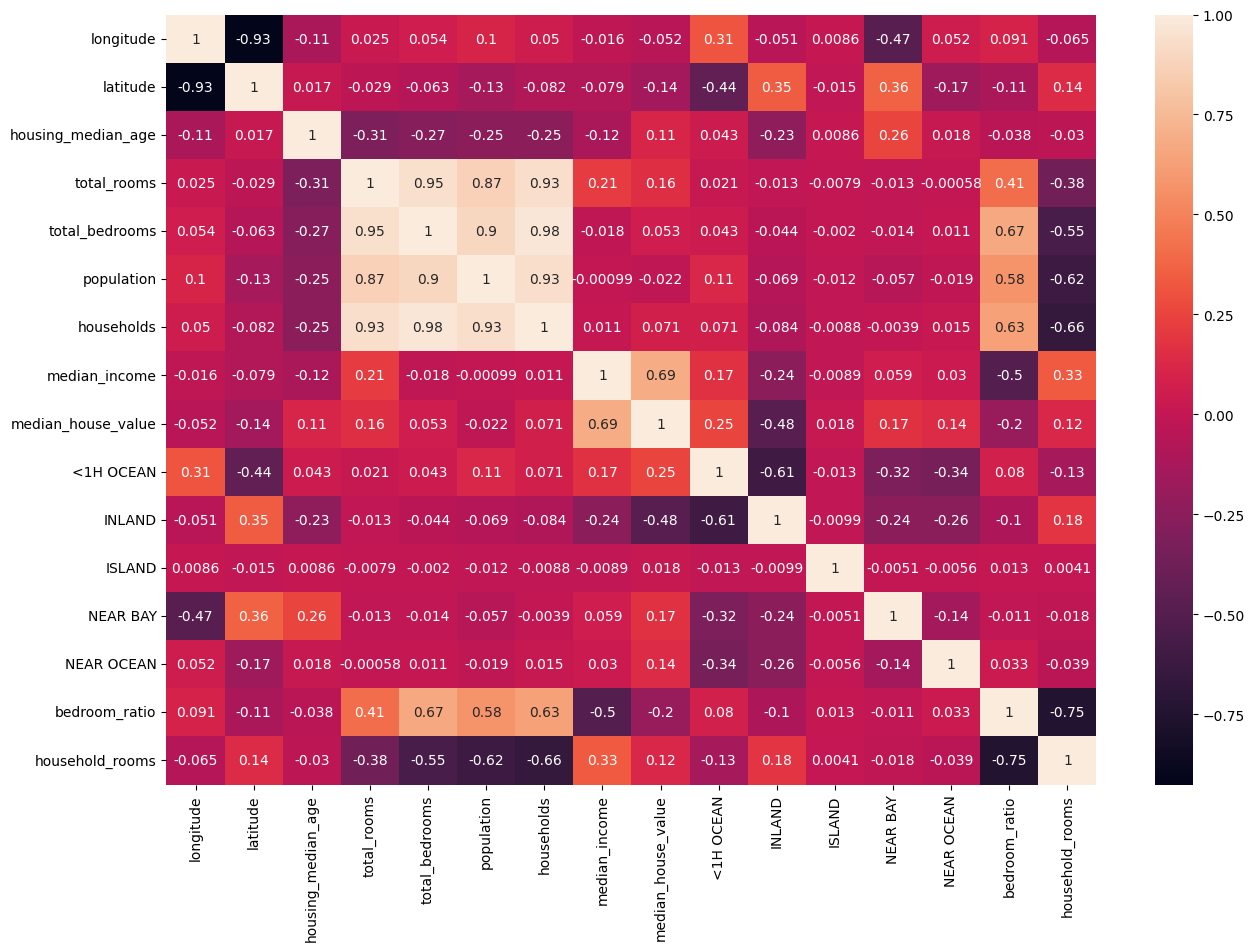

In [15]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot= True) # median house corr high to the median house values. bedroom has negative

Model Training nad test

In [16]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']


linReg = LinearRegression()
linReg.fit(x_train,y_train)


LinearRegression()

In [17]:
test_data = x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms'] +1) #taking the log as the data is not disorted inaccurate and falls left and making it and +1 for any 0 value
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'] +1)
test_data['population']=np.log(test_data['population'] +1)
test_data['households']=np.log(test_data['households'] +1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) # adding the new feature that is training data
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [18]:
linReg.score(x_test, y_test)# 66%

0.673961465633083

In [35]:
linReg = LinearRegression()
linReg.fit(x_train_scaler, y_train)
linReg.score(x_test_s, y_test)

0.673961465633083

In [19]:
from sklearn.ensemble import RandomForestRegressor
freg = RandomForestRegressor()

freg.fit(x_test,y_test)

RandomForestRegressor()

In [20]:
freg.score(x_test, y_test) #96%

0.9697787163443515

In [21]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train_scaler = scale.fit_transform(x_train)

In [22]:
x_test_s = scale.transform(x_test)

In [23]:
#parameter grid grid search and cross validation - in this K fold: k is the number and in all folds ex: 10 in that 9 training 1 test doing all possible combination
#random forest regessor is scale can
freg.fit(x_train_scaler,y_train)
freg.score(x_test_s, y_test) # 81% scaling it worst

0.8104948180645616

In [24]:
from sklearn.model_selection import GridSearchCV
freg= RandomForestRegressor()

para_grid = {
    "n_estimators":[100,150,200],
    "min_samples_split":[1,2,4],
    "max_depth":[None, 1, 4],
    "n_jobs":[1,2,3]
}
grid_s = GridSearchCV(freg, para_grid, cv=5,
                      scoring="neg_mean_squared_error",
                      return_train_score = True)
grid_s.fit(x_train_scaler,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 4],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 150, 200], 'n_jobs': [1, 2, 3]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_s.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=150, n_jobs=1)

In [26]:
grid_s.best_estimator_.score(x_test_s, y_test)

0.8118146406588147

In [27]:
from sklearn.linear_model import ElasticNet

elas = ElasticNet()

elas.fit(x_train, y_train)
elas.score(x_test, y_test)#58%

0.5869773898924295

In [28]:

elas.fit(x_train_scaler, y_train)
elas.score(x_test_s, y_test)#58%


0.5671664735370945